Keras の LSTM で sin 波 の予測
==

データ作成
--

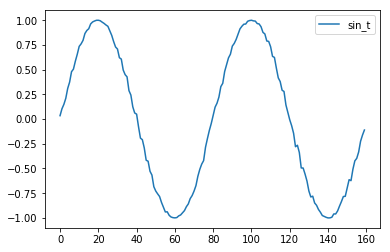

In [1]:
import pandas as pd
import numpy as np
import math
import random
%matplotlib inline
random.seed(0)
# 乱数の係数
random_factor = 0.05
# サイクルあたりのステップ数
steps_per_cycle = 80
# 生成するサイクル数
number_of_cycles = 50

df = pd.DataFrame(np.arange(steps_per_cycle * number_of_cycles + 1), columns=["t"])
df["sin_t"] = df.t.apply(lambda x: math.sin(x * (2 * math.pi / steps_per_cycle)+ random.uniform(-1.0, +1.0) * random_factor))
df[["sin_t"]].head(steps_per_cycle * 2).plot()

In [2]:
def _load_data(data, n_prev = 100):  
    """
    data should be pd.DataFrame()
    """

    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data.iloc[i:i+n_prev].as_matrix())
        docY.append(data.iloc[i+n_prev].as_matrix())
    alsX = np.array(docX)
    alsY = np.array(docY)

    return alsX, alsY

def train_test_split(df, test_size=0.1, n_prev = 100):  
    """
    This just splits data to training and testing parts
    """
    ntrn = round(len(df) * (1 - test_size))
    ntrn = int(ntrn)
    X_train, y_train = _load_data(df.iloc[0:ntrn], n_prev)
    X_test, y_test = _load_data(df.iloc[ntrn:], n_prev)

    return (X_train, y_train), (X_test, y_test)

In [3]:
length_of_sequences = 100
(X_train, y_train), (X_test, y_test) = train_test_split(df[["sin_t"]], n_prev =length_of_sequences)  

モデル作成
--

In [4]:
from keras.models import Sequential  
from keras.layers.core import Dense, Activation  
from keras.layers.recurrent import LSTM


in_out_neurons = 1
hidden_neurons = 300

model = Sequential()  
model.add(LSTM(hidden_neurons, batch_input_shape=(None, length_of_sequences, in_out_neurons), return_sequences=False))  
model.add(Dense(in_out_neurons))  
model.add(Activation("linear"))  
model.compile(loss="mean_squared_error", optimizer="rmsprop")
model.fit(X_train, y_train, batch_size=600, nb_epoch=15, validation_split=0.05) 

Using TensorFlow backend.
E:\Anaconda3\envs\keras\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 3325 samples, validate on 176 samples
Epoch 1/15
3325/3325 [==============================] - 2s 735us/step - loss: 0.2639 - val_loss: 0.0435
Epoch 2/15
3325/3325 [==============================] - 1s 292us/step - loss: 0.0437 - val_loss: 0.0015
Epoch 3/15
3325/3325 [==============================] - 1s 292us/step - loss: 0.0070 - val_loss: 0.0793
Epoch 4/15
3325/3325 [==============================] - 1s 292us/step - loss: 0.0174 - val_loss: 0.0084
Epoch 5/15
3325/3325 [==============================] - 1s 294us/step - loss: 0.0152 - val_loss: 0.0087
Epoch 6/15
3325/3325 [==============================] - 1s 294us/step - loss: 0.0089 - val_loss: 0.0078
Epoch 7/15
3325/3325 [==============================] - 1s 294us/step - loss: 0.0093 - val_loss: 0.0067
Epoch 8/15
3325/3325 [==============================] - 1s 293us/step - loss: 0.0078 - val_loss: 0.0046
Epoch 9/15
3325/3325 [==============================] - 1s 293us/step - loss: 0.0075 - val_loss: 0.0078
Epoch 10/15
3325/

In [5]:
predicted = model.predict(X_test) 

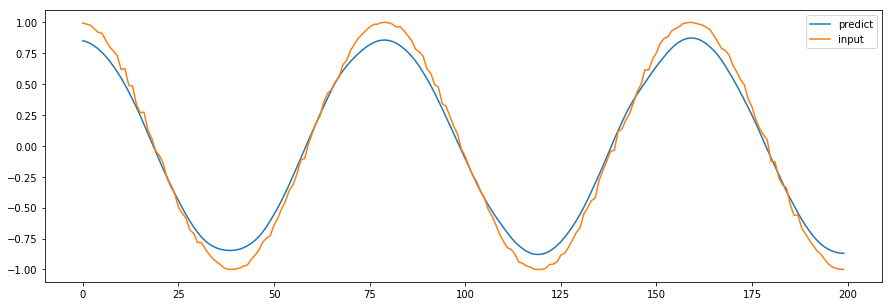

In [6]:
dataf =  pd.DataFrame(predicted[:200])
dataf.columns = ["predict"]
dataf["input"] = y_test[:200]
dataf.plot(figsize=(15, 5))

パラメータを変更してみた
--

まずは活性化関数の変更 Linear を使用していたが、CNN で使った ReLU に変更してみる。

In [7]:
from keras.models import Sequential  
from keras.layers.core import Dense, Activation  
from keras.layers.recurrent import LSTM


in_out_neurons = 1
hidden_neurons = 300

model = Sequential()  
model.add(LSTM(hidden_neurons, batch_input_shape=(None, length_of_sequences, in_out_neurons), return_sequences=False))  
model.add(Dense(in_out_neurons))  
model.add(Activation("relu"))  
model.compile(loss="mean_squared_error", optimizer="rmsprop")
model.fit(X_train, y_train, batch_size=600, nb_epoch=15, validation_split=0.05) 

E:\Anaconda3\envs\keras\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 3325 samples, validate on 176 samples
Epoch 1/15
3325/3325 [==============================] - 2s 458us/step - loss: 0.3339 - val_loss: 0.2649
Epoch 2/15
3325/3325 [==============================] - 1s 292us/step - loss: 0.2631 - val_loss: 0.2591
Epoch 3/15
3325/3325 [==============================] - 1s 292us/step - loss: 0.2521 - val_loss: 0.2589
Epoch 4/15
3325/3325 [==============================] - 1s 292us/step - loss: 0.2589 - val_loss: 0.2589
Epoch 5/15
3325/3325 [==============================] - 1s 292us/step - loss: 0.2564 - val_loss: 0.2589
Epoch 6/15
3325/3325 [==============================] - 1s 293us/step - loss: 0.2556 - val_loss: 0.2595
Epoch 7/15
3325/3325 [==============================] - 1s 293us/step - loss: 0.2535 - val_loss: 0.2584
Epoch 8/15
3325/3325 [==============================] - 1s 292us/step - loss: 0.2539 - val_loss: 0.2597
Epoch 9/15
3325/3325 [==============================] - 1s 291us/step - loss: 0.2558 - val_loss: 0.2583
Epoch 10/15
3325/

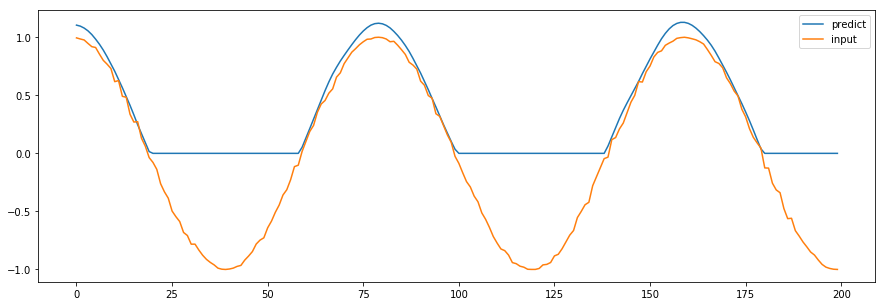

In [8]:
predicted = model.predict(X_test) 
dataf =  pd.DataFrame(predicted[:200])
dataf.columns = ["predict"]
dataf["input"] = y_test[:200]
dataf.plot(figsize=(15, 5))

結果、ReLU の関数は0以下は全て 0 を出力するので上記のような結果に。
![PROCRASIST](https://cdn-ak.f.st-hatena.com/images/fotolife/i/imslotter/20170112/20170112005543.png)

次はリベンジ。  
オプティマイザーを adam に変更してみる。

In [9]:
from keras.models import Sequential  
from keras.layers.core import Dense, Activation  
from keras.layers.recurrent import LSTM


in_out_neurons = 1
hidden_neurons = 300

model = Sequential()  
model.add(LSTM(hidden_neurons, batch_input_shape=(None, length_of_sequences, in_out_neurons), return_sequences=False))  
model.add(Dense(in_out_neurons))  
model.add(Activation("linear"))  
model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(X_train, y_train, batch_size=600, nb_epoch=15, validation_split=0.05) 

E:\Anaconda3\envs\keras\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 3325 samples, validate on 176 samples
Epoch 1/15
3325/3325 [==============================] - 2s 510us/step - loss: 0.3120 - val_loss: 0.0909
Epoch 2/15
3325/3325 [==============================] - 1s 291us/step - loss: 0.0482 - val_loss: 0.0162
Epoch 3/15
3325/3325 [==============================] - 1s 291us/step - loss: 0.0081 - val_loss: 0.0057
Epoch 4/15
3325/3325 [==============================] - 1s 291us/step - loss: 0.0052 - val_loss: 8.6209e-04
Epoch 5/15
3325/3325 [==============================] - 1s 292us/step - loss: 0.0017 - val_loss: 0.0028
Epoch 6/15
3325/3325 [==============================] - 1s 291us/step - loss: 0.0026 - val_loss: 0.0020
Epoch 7/15
3325/3325 [==============================] - 1s 292us/step - loss: 0.0014 - val_loss: 9.6791e-04
Epoch 8/15
3325/3325 [==============================] - 1s 291us/step - loss: 9.5803e-04 - val_loss: 0.0010
Epoch 9/15
3325/3325 [==============================] - 1s 292us/step - loss: 8.9708e-04 - val_loss: 8.1499e-

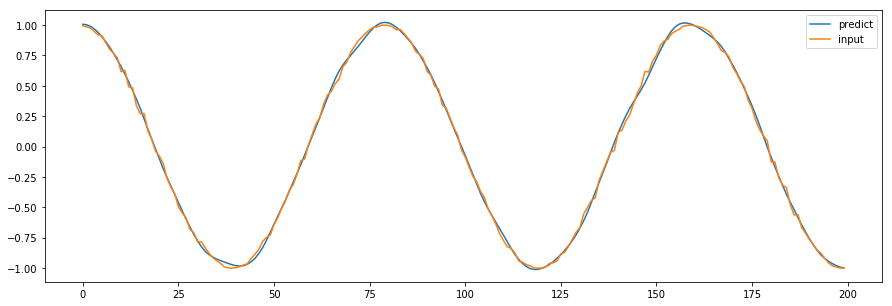

In [10]:
predicted = model.predict(X_test) 
dataf =  pd.DataFrame(predicted[:200])
dataf.columns = ["predict"]
dataf["input"] = y_test[:200]
dataf.plot(figsize=(15, 5))

学習は進んだようだが、過学習が発生。Input のノイズにかなり引っ張られていて sin 派の形から離れている部分が多い。

次は、Early Stopping を適用して再実験。

In [11]:
from keras.models import Sequential  
from keras.layers.core import Dense, Activation 
from keras.layers.recurrent import LSTM
from keras.callbacks import EarlyStopping


in_out_neurons = 1
hidden_neurons = 300

model = Sequential()  
model.add(LSTM(hidden_neurons, batch_input_shape=(None, length_of_sequences, in_out_neurons), return_sequences=False))  
model.add(Dense(in_out_neurons))  
model.add(Activation("linear"))  
model.compile(loss="mean_squared_error", optimizer="adam")
early_stopping = EarlyStopping(monitor='val_loss', patience=2)
model.fit(X_train, y_train, batch_size=600, nb_epoch=15, validation_split=0.05, callbacks=[early_stopping]) 

E:\Anaconda3\envs\keras\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 3325 samples, validate on 176 samples
Epoch 1/15
3325/3325 [==============================] - 2s 535us/step - loss: 0.2342 - val_loss: 0.0631
Epoch 2/15
3325/3325 [==============================] - 1s 293us/step - loss: 0.0354 - val_loss: 0.0071
Epoch 3/15
3325/3325 [==============================] - 1s 292us/step - loss: 0.0072 - val_loss: 0.0083
Epoch 4/15
3325/3325 [==============================] - 1s 292us/step - loss: 0.0047 - val_loss: 0.0035
Epoch 5/15
3325/3325 [==============================] - 1s 293us/step - loss: 0.0029 - val_loss: 0.0029
Epoch 6/15
3325/3325 [==============================] - 1s 293us/step - loss: 0.0021 - val_loss: 0.0015
Epoch 7/15
3325/3325 [==============================] - 1s 293us/step - loss: 0.0012 - val_loss: 0.0014
Epoch 8/15
3325/3325 [==============================] - 1s 292us/step - loss: 0.0010 - val_loss: 9.1594e-04
Epoch 9/15
3325/3325 [==============================] - 1s 294us/step - loss: 8.4196e-04 - val_loss: 8.7456e-04
Epoch

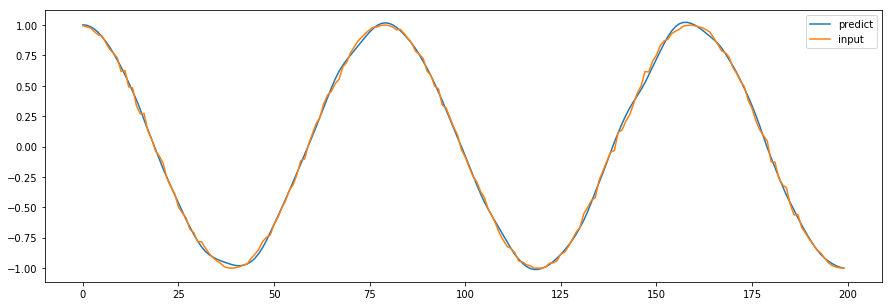

In [12]:
predicted = model.predict(X_test) 
dataf =  pd.DataFrame(predicted[:200])
dataf.columns = ["predict"]
dataf["input"] = y_test[:200]
dataf.plot(figsize=(15, 5))

結果変わらず。Epoch を減らしてみる。

In [13]:
from keras.models import Sequential  
from keras.layers.core import Dense, Activation 
from keras.layers.recurrent import LSTM


in_out_neurons = 1
hidden_neurons = 300

model = Sequential()  
model.add(LSTM(hidden_neurons, batch_input_shape=(None, length_of_sequences, in_out_neurons), return_sequences=False))  
model.add(Dense(in_out_neurons))  
model.add(Activation("linear"))  
model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(X_train, y_train, batch_size=600, nb_epoch=8, validation_split=0.05) 

E:\Anaconda3\envs\keras\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 3325 samples, validate on 176 samples
Epoch 1/8
3325/3325 [==============================] - 2s 560us/step - loss: 0.2334 - val_loss: 0.0639
Epoch 2/8
3325/3325 [==============================] - 1s 293us/step - loss: 0.0373 - val_loss: 0.0069
Epoch 3/8
3325/3325 [==============================] - 1s 293us/step - loss: 0.0066 - val_loss: 0.0079
Epoch 4/8
3325/3325 [==============================] - 1s 294us/step - loss: 0.0042 - val_loss: 0.0030
Epoch 5/8
3325/3325 [==============================] - 1s 294us/step - loss: 0.0026 - val_loss: 0.0028
Epoch 6/8
3325/3325 [==============================] - 1s 293us/step - loss: 0.0020 - val_loss: 0.0013
Epoch 7/8
3325/3325 [==============================] - 1s 293us/step - loss: 0.0012 - val_loss: 0.0012
Epoch 8/8
3325/3325 [==============================] - 1s 293us/step - loss: 0.0010 - val_loss: 7.7267e-04


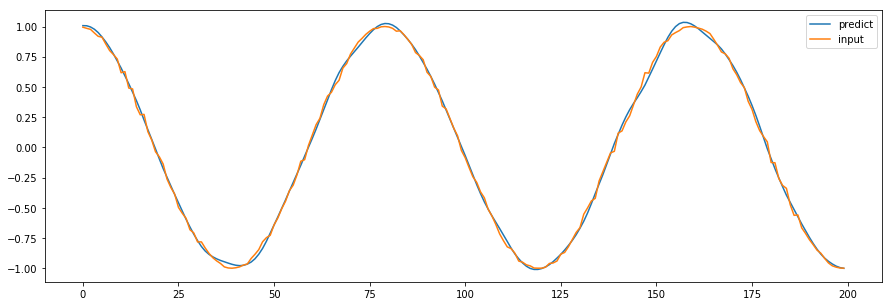

In [14]:
predicted = model.predict(X_test) 
dataf =  pd.DataFrame(predicted[:200])
dataf.columns = ["predict"]
dataf["input"] = y_test[:200]
dataf.plot(figsize=(15, 5))

### 結果

CNN で出た結果を少し反映してみたけど、RNN においては事情が違うよう。  
データが変わる。分類・予測。などにより適用するパラメータモデルを変更することが必要みたい。